In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np
import papermill as pm

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345369 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

56.6445150375 seconds
[ 0.]
[ 0.]
56.412528038 seconds
[ 0.]
[ 0.]
57.287047863 seconds
[ 0.]
[ 0.]
58.2050027847 seconds
[ 0.]
[ 0.04713806]
59.0981321335 seconds
[ 0.]
[ 0.29268932]
58.8035151958 seconds
[ 0.3742227]
[ 0.57141553]
59.7226920128 seconds
[ 0.67981948]
[ 0.93119265]
62.8695530891 seconds
[ 0.9573756]
[ 0.84992088]
65.9202511311 seconds
[ 1.13467716]
[ 0.55064408]
66.9807589054 seconds
[ 1.307454]
[ 0.36985843]
66.9061899185 seconds
[ 1.42294459]
[ 0.20239416]
66.8350229263 seconds
[ 1.49546478]
[ 0.08897874]
67.331001997 seconds
[ 1.53896474]
[ 0.01198425]
64.2748010159 seconds
[ 1.56071987]
[ 0.03798935]
68.2867219448 seconds
[ 1.552596]
[  5.99966056e-08]


<IPython.core.display.Javascript object>


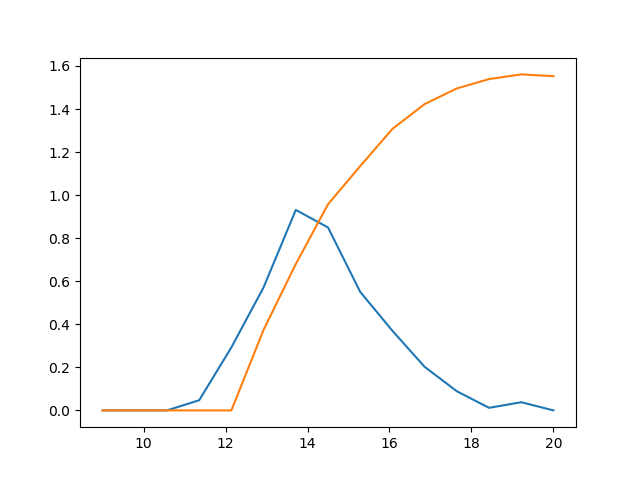

<IPython.core.display.Javascript object>


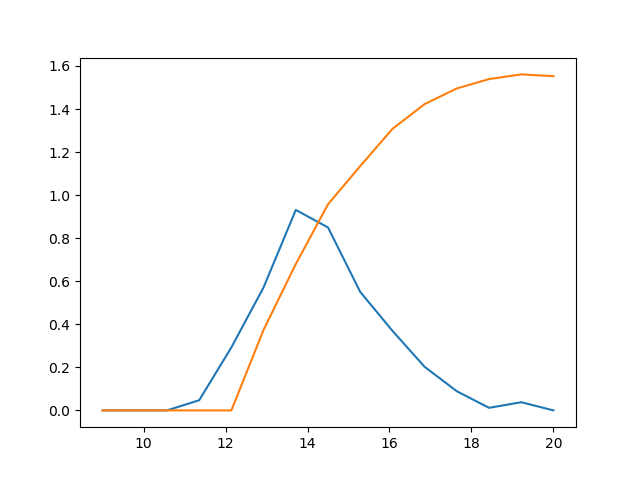

In [7]:
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)
pm.display('mHcurves', f1)

In [8]:
np.max(Hp)/np.max(Mp)

0.59664304245400579

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.3742227 ],
       [ 0.67981948],
       [ 0.9573756 ],
       [ 1.13467716],
       [ 1.307454  ],
       [ 1.42294459],
       [ 1.49546478],
       [ 1.53896474],
       [ 1.56071987],
       [ 1.552596  ]])

<IPython.core.display.Javascript object>


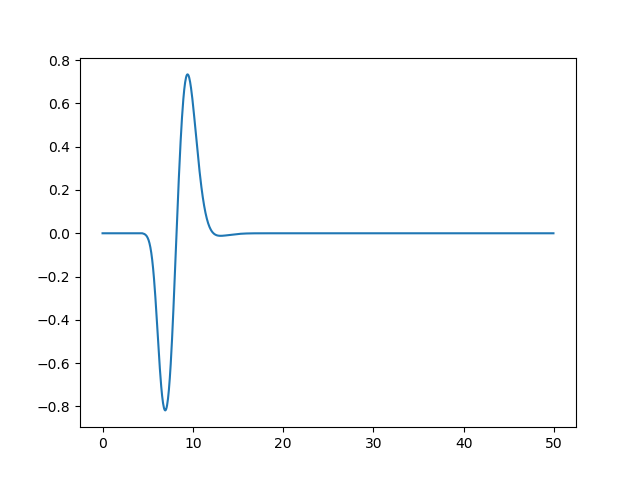

<IPython.core.display.Javascript object>


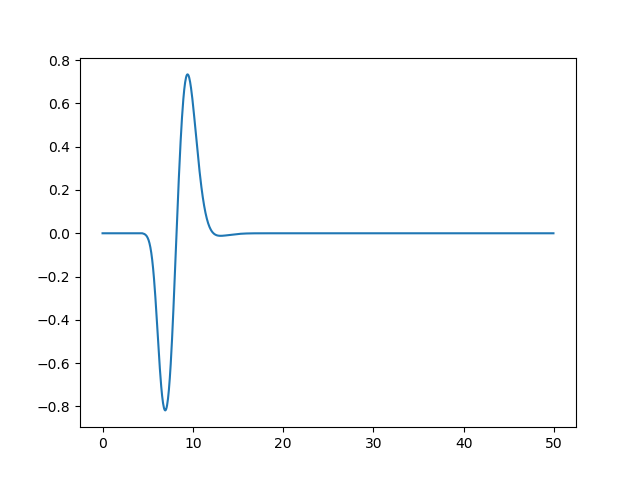

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,14])
pm.display('mhsignal', f2)

In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


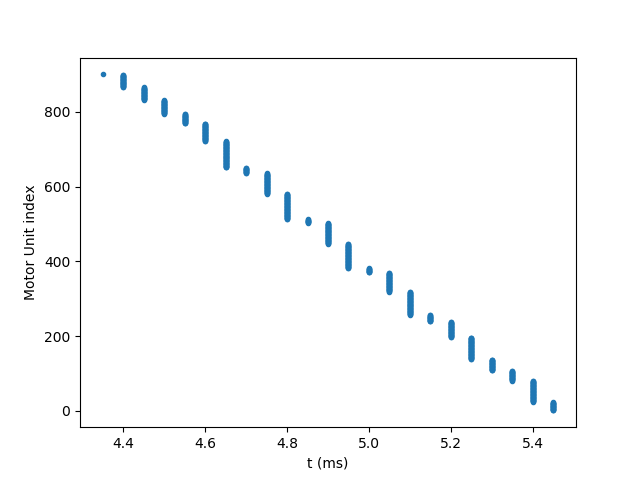

<IPython.core.display.Javascript object>


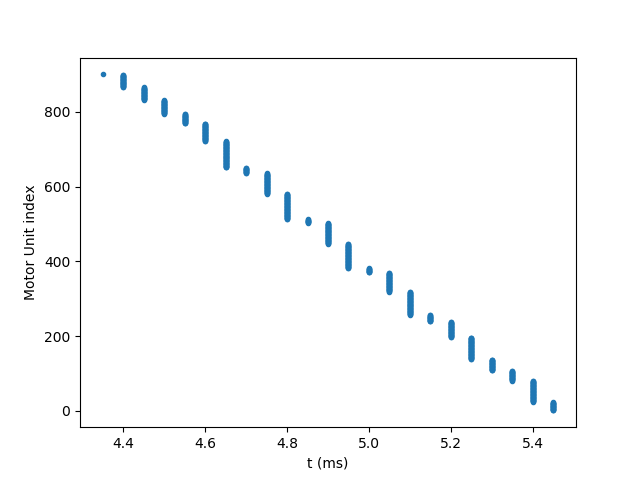

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
pm.display('MNspikes', f3)

In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)